In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/sample.csv.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv
/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv


# Roll_no:21f1000556

# Necessary Imports

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV
from sklearn.dummy import DummyRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.preprocessing import OneHotEncoder,PolynomialFeatures
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,StandardScaler,MinMaxScaler
from sklearn.pipeline import Pipeline,make_pipeline,FeatureUnion
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor
%matplotlib inline
import seaborn as sns
sns.set()
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

# # Reading of data from CSV file

In [3]:
#Reading of data from CSV file
df=pd.read_csv('/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/train.csv')
data=df.copy()
# creating copy of dataset

# EDA-Exploratory Data Analysis

In [4]:
data.shape

(175000, 17)

Dataset contains 175000 rows and 17 columns,columns are also known as features

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

The dataset comprises of various columns, each offering valuable insights into taxi rides so that we can predict the total_amount.

* Total_amount: The total amount paid by the traveler for the taxi ride.

* VendorID: An identifier for taxi vendors.
 
* tpep_pickup_datetime and tpep_dropoff_datetime: Timestamps indicating pickup and dropoff times.
 
* Passenger count: The number of passengers during the ride.
 
* Trip_distance: The distance traveled during the trip.
 
* RatecodeID: Rate code for the ride.
 
* Store and fwd_flag: A flag indicating whether the trip data was stored and forwarded.
 
* PULocationID and DOLocationID: Pickup and dropoff location identifiers.
 
* Payment type: Payment type used for the ride.
 
* Tolls amount:Amount payed to the toll centers.
 
* Airport fee:Amount to be payed to airport.
 
* Tip Amount:Tip given by the travellar

In these dataset,there are 4 features which are not having numerical values.So first we need to preprocess these dataset.So,that we can apply any model.

In [6]:
print("\nTrain Data:\n")
print(data.describe())


Train Data:

            VendorID  passenger_count  trip_distance     RatecodeID  \
count  175000.000000    168923.000000  175000.000000  168923.000000   
mean        0.728377         1.357678       5.145930       1.518307   
std         0.445606         0.891283     394.971052       6.514678   
min         0.000000         0.000000       0.000000       1.000000   
25%         0.000000         1.000000       1.080000       1.000000   
50%         1.000000         1.000000       1.840000       1.000000   
75%         1.000000         1.000000       3.610000       1.000000   
max         2.000000         9.000000  135182.060000      99.000000   

        PULocationID   DOLocationID          extra     tip_amount  \
count  175000.000000  175000.000000  175000.000000  175000.000000   
mean      132.710349     132.701429       1.932143       6.127497   
std        76.148799      76.192493       1.948497       4.610834   
min         1.000000       1.000000      -7.500000       0.000079   
2

From these observations, we can conclude that the dataset is skewed to the right, meaning that there are more values above the mean than below the mean. We can also conclude that the dataset is relatively spread out, meaning that there is a significant amount of variability in the data.

From these observations, we can conclude that the dataset is skewed to the right, meaning that there are more trips with one passenger or less than there are trips with more than one passenger. We can also conclude that the majority of trips have one or two passengers.

The distribution is positively skewed, meaning that there are more tips on the lower end of the distribution than on the higher end. This is evident from the fact that the median (5.286217) is less than the mean (6.127497).

In [7]:
data.head()
#gives 1st 5 rows of dataset

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
0,1,2023-06-28 17:20:21,2023-06-28 16:34:45,1.0,2.14,1.0,N,120,9,Credit Card,2.5,7.165589,0.0,1.0,20.64,2.5,0.0
1,0,2023-06-29 23:05:01,2023-06-29 22:01:35,1.0,2.70,1.0,N,15,215,Credit Card,3.5,6.067401,0.0,1.0,25.55,2.5,0.0
2,1,2023-06-30 10:19:31,2023-06-30 11:13:10,1.0,1.15,1.0,N,167,223,Credit Card,0.0,4.111547,0.0,1.0,17.64,2.5,0.0
3,0,2023-06-29 13:23:09,2023-06-29 14:20:01,1.0,0.40,1.0,N,128,239,Credit Card,2.5,6.411079,0.0,1.0,12.80,2.5,0.0
4,1,2023-06-29 22:03:32,2023-06-29 22:22:22,3.0,1.10,1.0,N,203,52,Credit Card,1.0,4.769377,0.0,1.0,18.00,2.5,0.0


In [8]:
data.tail()
#gives last 5 rows of dataset

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,extra,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee
174995,1,2023-06-30 22:50:57,2023-06-30 22:22:22,3.0,3.45,1.0,N,147,167,Credit Card,1.0,8.732495,0.0,1.0,28.08,2.5,0.00
174996,1,2023-06-30 13:03:33,2023-06-30 14:04:57,1.0,9.44,1.0,N,154,191,Cash,5.0,0.283275,0.0,1.0,59.95,2.5,1.75
174997,0,2023-06-29 11:03:32,2023-06-29 12:13:34,1.0,2.40,1.0,N,168,106,Credit Card,2.5,4.245354,0.0,1.0,33.50,2.5,0.00
174998,1,2023-06-29 19:47:17,2023-06-29 19:08:55,1.0,4.71,1.0,N,240,100,Credit Card,2.5,10.479776,0.0,1.0,40.80,2.5,0.00
174999,1,2023-06-30 21:26:43,2023-06-30 22:54:42,1.0,1.01,1.0,N,153,72,Credit Card,1.0,6.541699,0.0,1.0,16.32,2.5,0.00


# Missing Values in Dataset

In [9]:
data.isnull().sum()
# finding null values in dataset

VendorID                    0
tpep_pickup_datetime        0
tpep_dropoff_datetime       0
passenger_count          6077
trip_distance               0
RatecodeID               6077
store_and_fwd_flag       6077
PULocationID                0
DOLocationID                0
payment_type                0
extra                       0
tip_amount                  0
tolls_amount                0
improvement_surcharge       0
total_amount                0
congestion_surcharge     6077
Airport_fee              6077
dtype: int64

From the above information we can see that mostly features dont have missing values but passenger_count, RatecodeID, store_and_fwd_flag, congestion_surcharge and Airport_fee contains 6077 missing values which need to be either eliminate or impute in order to fit any model or finding correlation between other features and Target_feature

In [10]:
def mv_summary(dataset):
    missing_values = dataset.isnull().sum()
    
    # finds total rows in dataset
    total_rows = len(dataset)
    
    # percentage of missing values in any feature
    mv_percentage = (missing_values / total_rows) * 100
    
    # finds total ? marks in dataset
    question_mark_counts = (dataset == "?").sum()

    summary= pd.DataFrame({
        "Missing Values": missing_values,
        "Missing Values Percentage": np.round(mv_percentage,2),
        "Count of '?'": question_mark_counts
    })

    return summary

In [11]:
mv_summary(data)

,Missing Values,Missing Values Percentage,Count of '?'
VendorID,0,0.00,0
tpep_pickup_datetime,0,0.00,0
tpep_dropoff_datetime,0,0.00,0
passenger_count,6077,3.47,0
trip_distance,0,0.00,0
RatecodeID,6077,3.47,0
store_and_fwd_flag,6077,3.47,0
PULocationID,0,0.00,0
DOLocationID,0,0.00,0
payment_type,0,0.00,0


From the above we can see that only 4 columns contains missing values and those missing values only comprises of 3.47 % of overall column size means approx 97 % of data is complete or does not have any missing values.We can also see that dataset also does not contains any question marks(?) 

# Graphical Analysis of Data

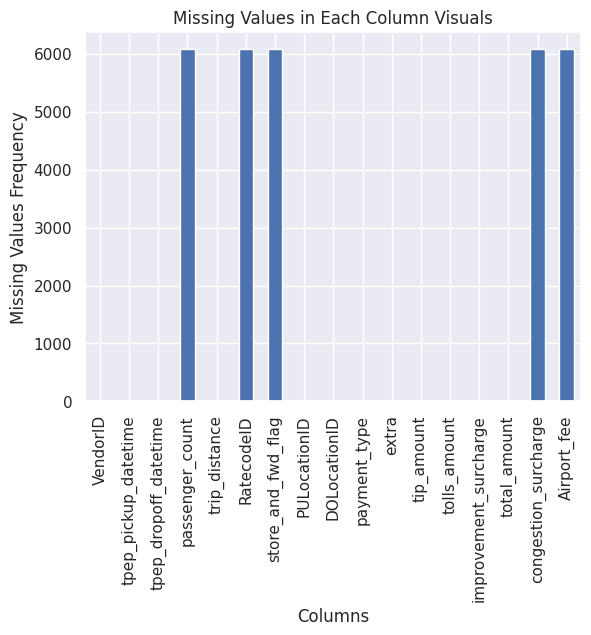

In [12]:
missing_values = data.isnull().sum()
missing_values.plot(kind='bar')

plt.title('Missing Values in Each Column Visuals')
plt.xlabel('Columns')
plt.ylabel('Missing Values Frequency')
plt.show()

Features having missing values:
* Passenger count,
* RatecodeID,
* store_and_fwd_flag,
* congestion_surcharge,
* Airport_fee

In [13]:
numerical_columns = list(data.select_dtypes("number").columns)

features_with_negatives_values = data[numerical_columns].lt(0).any()

print("Features with negative values:\n ")
for feature, has_negatives in features_with_negatives_values.items():
    if has_negatives:
        print("*", feature)

Features with negative values:
 
* extra
* tolls_amount
* improvement_surcharge
* total_amount
* congestion_surcharge
* Airport_fee


From all the features only below feature contains negative values
* trip_distance
* extra
* tip_amount
* tolls_amount
* congestion_surcharge
* Airport_fee
* improvement_surcharge
* total_amount 

In [14]:
data['VendorID'].value_counts()

VendorID
1    127340
0     47597
2        63
Name: count, dtype: int64

from these we can see that the column or feature VendorID have only 3 types of categories 0,1 or 2.The frequency of 0 is 47597 and frequency of 1 is 127340 and frequency of 2 is 63 only. When we sum all thefrequency we get 175000 which is total no. of rows in our dataset.From these we can also see that frequency of 2 is only 63 which is very small as compared to others.So it may contribute to potential outliers

<Axes: xlabel='VendorID', ylabel='count'>

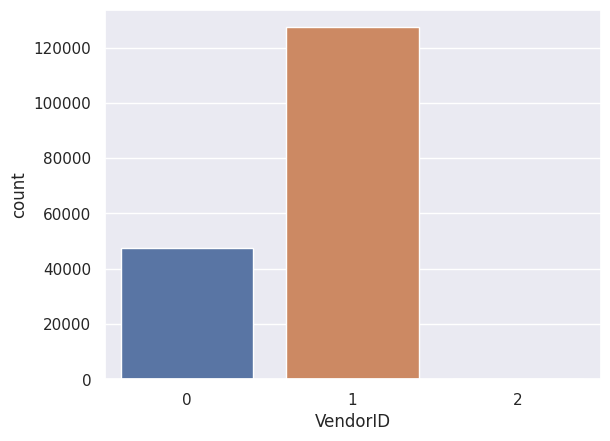

In [15]:
sns.countplot(x=data['VendorID'])

In [16]:
data['passenger_count'].value_counts()

passenger_count
1.0    128534
2.0     24316
3.0      6018
4.0      3668
0.0      2818
5.0      1970
6.0      1596
8.0         2
9.0         1
Name: count, dtype: int64

From the above we can see that Passenger Count have values from 0 to 9 with different frequencies.The most common number of passengers is 1 with a count of 128,534. This suggests that the majority of trips in our dataset involve a single passenger.There are some unusual values such as 0
The presence of 0 passengers might represent an error or missing data unless it's a special case
The counts for 8 and 9 passengers are also very low which might be ouliers

<Axes: xlabel='passenger_count', ylabel='count'>

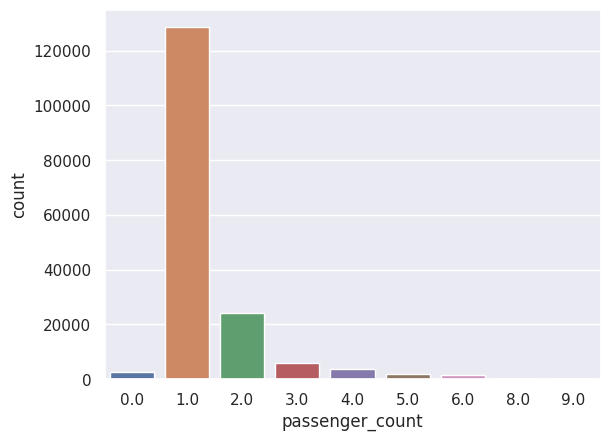

In [17]:
sns.countplot(x=data['passenger_count'])

In [18]:
data['improvement_surcharge'].value_counts()

improvement_surcharge
 1.0    173145
-1.0      1725
 0.3        85
 0.0        45
Name: count, dtype: int64

Improvement surcharge have only 4 type of categories -1, 0, 0.3 and 1

<Axes: xlabel='improvement_surcharge', ylabel='count'>

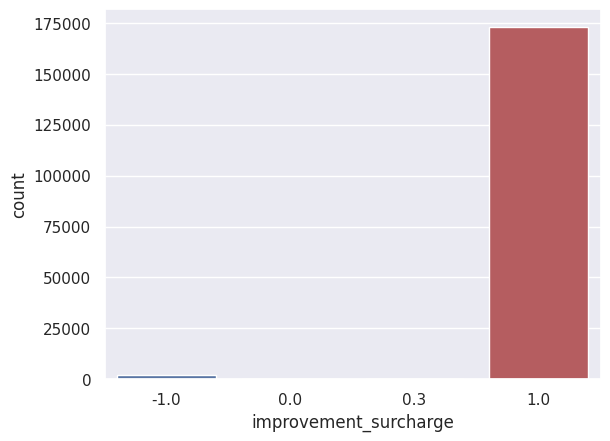

In [19]:
sns.countplot(x=data['improvement_surcharge'])

In [20]:
data['congestion_surcharge'].value_counts()

congestion_surcharge
 2.5    153212
 0.0     14325
-2.5      1386
Name: count, dtype: int64

Congestion surcharge have only 3 type of categories 2.5, 0, -2.5

<Axes: xlabel='congestion_surcharge', ylabel='count'>

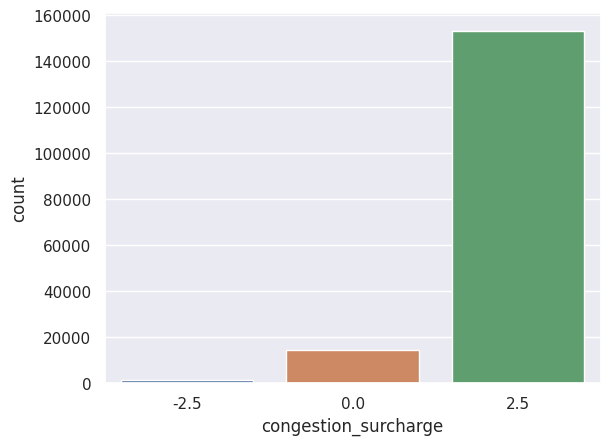

In [21]:
sns.countplot(x=data['congestion_surcharge'])

In [22]:
data['Airport_fee'].value_counts()

Airport_fee
 0.00    153074
 1.75     15590
-1.75       259
Name: count, dtype: int64

Airport Fee have 3 type of categories 0, 1.75 and -1.75

<Axes: xlabel='Airport_fee', ylabel='count'>

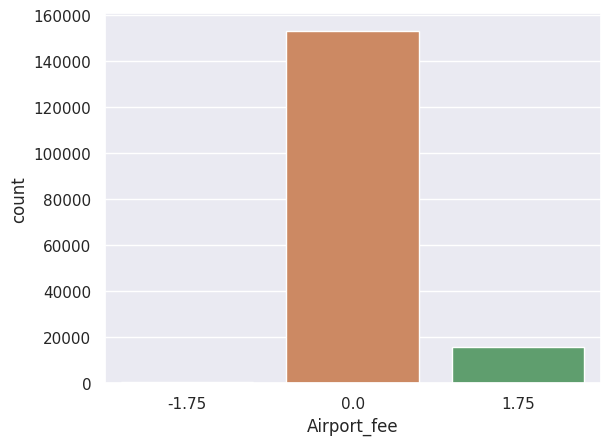

In [23]:
sns.countplot(x=data['Airport_fee'])

In [24]:
data['payment_type'].value_counts()

payment_type
Credit Card    135257
Cash            30141
Wallet           6077
unknown          2333
UPI              1192
Name: count, dtype: int64

The most common payment method is credit card, with a substantial count of 135,257. This suggests that a majority of trips are paid using credit cards.

Cash is the second most common payment method, with 30,141 instances. This indicates that a significant portion of trips still involves cash transactions.

Wallet payments are less frequent but still notable, with 6,077 instances. It shows a moderate adoption of digital wallet payments.

There are 2,333 instances where the payment type is labeled as "unknown." Investigating and resolving these instances might be necessary for a clearer and better analysis.

UPI payments have a lower count, with 1,192 instances. This indicates a lesser but still notable use of UPI as a payment method.

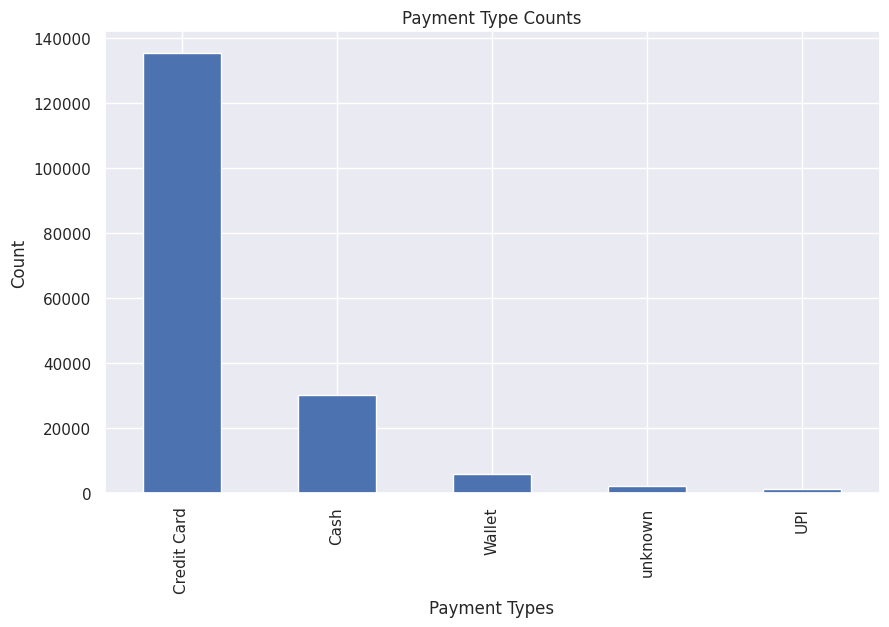

In [25]:
category_counts = data['payment_type'].value_counts()

plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar')
plt.title('Payment Type Counts')
plt.xlabel('Payment Types')
plt.ylabel('Count')
plt.show()

In [26]:
data['store_and_fwd_flag'].value_counts()

store_and_fwd_flag
N    167729
Y      1194
Name: count, dtype: int64

store and forward flag feature have 2 types of categories Y and N.While frequency of Y is too much compared to N.

<Axes: xlabel='store_and_fwd_flag', ylabel='count'>

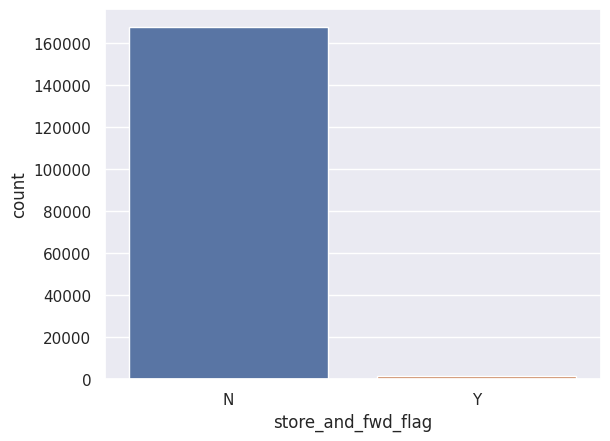

In [27]:
sns.countplot(x=data['store_and_fwd_flag'])

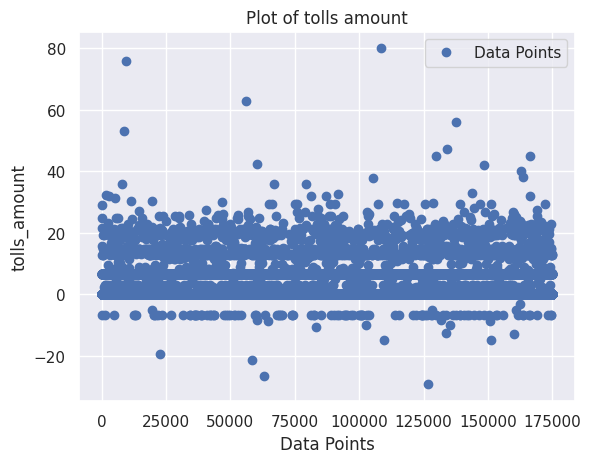

In [28]:
plt.plot(data['tolls_amount'], 'bo', label='Data Points')
plt.xlabel('Data Points')
plt.ylabel('tolls_amount')
plt.title('Plot of tolls amount')
plt.legend()
plt.show()

From above graph we can see that most of data points of tolls_amount feature lies within range (0,20).This suggests that most taxi rides in the dataset either did not incur toll charges or incurred relatively low toll charges.We can also see that there is very few case when taxi rides pay high for toll amount

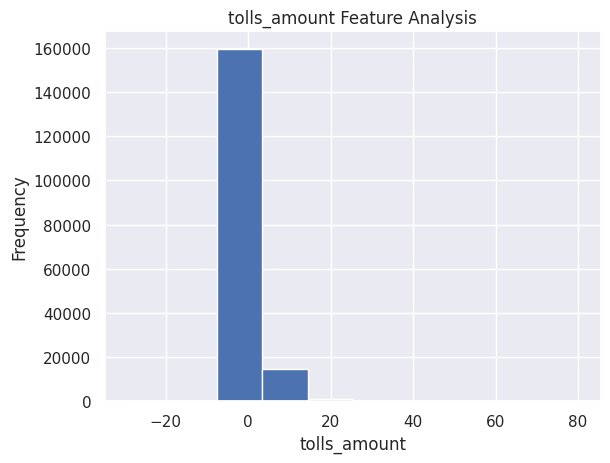

In [29]:
data['tolls_amount'].hist(bins=10)
plt.xlabel('tolls_amount')
plt.ylabel('Frequency')
plt.title('tolls_amount Feature Analysis')
plt.show()

In [30]:
# plt.plot(data['tolls_amount'], 'bo', label='Data Points')
# plt.xlabel('Data Points')
# plt.ylabel('tolls_amount')
# plt.title('Plot of tolls amount')
# plt.legend()
# plt.show()

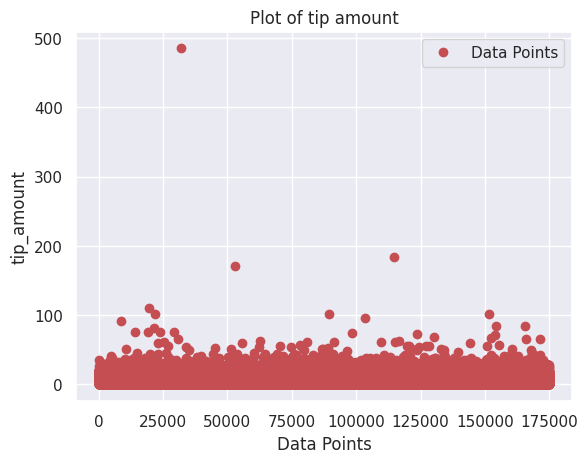

In [31]:
plt.plot(data['tip_amount'], 'ro', label='Data Points')
plt.xlabel('Data Points')
plt.ylabel('tip_amount')
plt.title('Plot of tip amount')
plt.legend()
plt.show()

From the above we can see that most of customers give tips in range from 0 to 40.While there is 1 pont where tip is approx to 500.so we need to check these datapoint as these may be outlier.

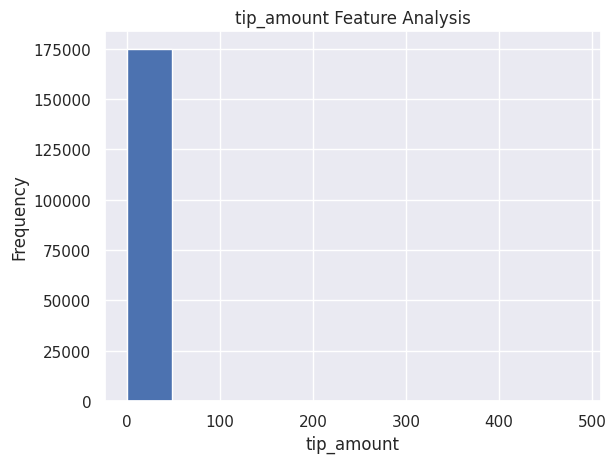

In [32]:
data['tip_amount'].hist(bins=10)
plt.xlabel('tip_amount')
plt.ylabel('Frequency')
plt.title('tip_amount Feature Analysis')
plt.show()

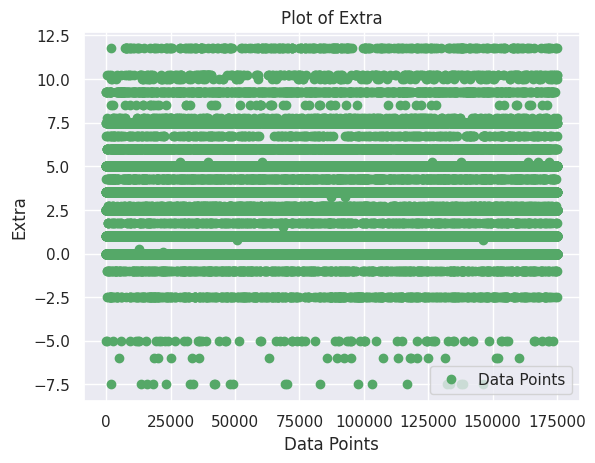

In [33]:
plt.plot(data['extra'], 'go', label='Data Points')
plt.xlabel('Data Points')
plt.ylabel('Extra')
plt.title('Plot of Extra')
plt.legend()
plt.show()

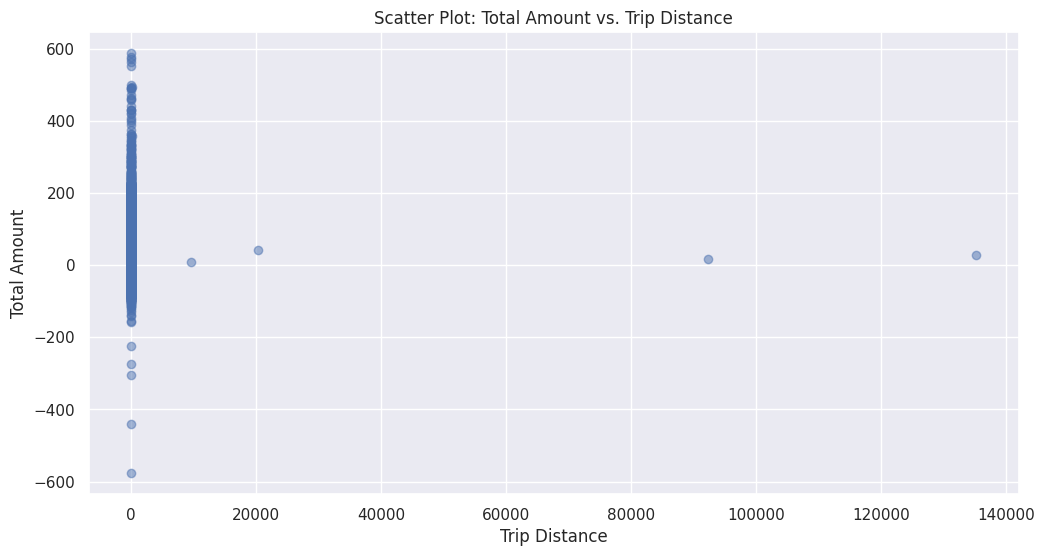

In [34]:
total_amount = data['total_amount']
trip_distance = data['trip_distance']

plt.figure(figsize=(12, 6))
plt.scatter(trip_distance, total_amount, alpha=0.5)
plt.title('Scatter Plot: Total Amount vs. Trip Distance')
plt.xlabel('Trip Distance')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

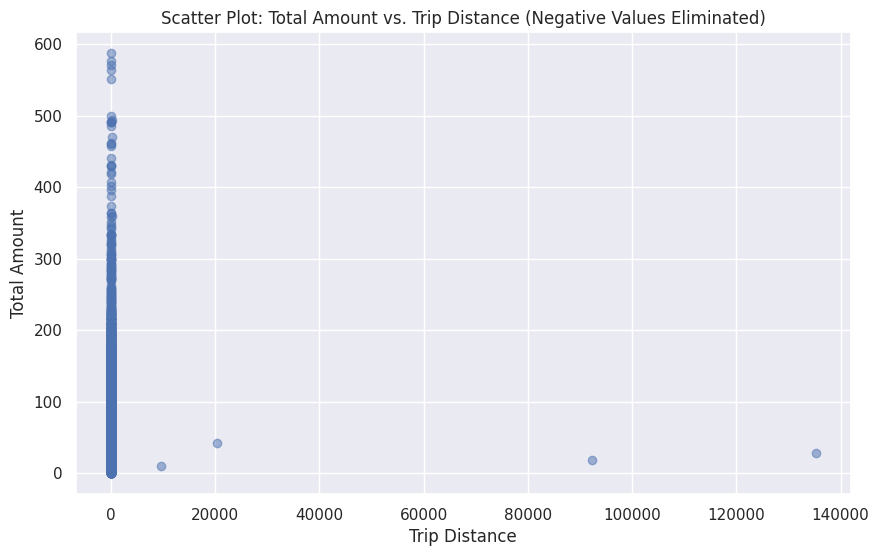

In [35]:

df_filtered = data[data['total_amount'] >= 0]

total_amount_filtered = df_filtered['total_amount']
trip_distance_filtered = df_filtered['trip_distance']

plt.figure(figsize=(10, 6))
plt.scatter(trip_distance_filtered, total_amount_filtered, alpha=0.5)
plt.title('Scatter Plot: Total Amount vs. Trip Distance (Negative Values Eliminated)')
plt.xlabel('Trip Distance')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

Correlation Coefficient 0.6847650291241023


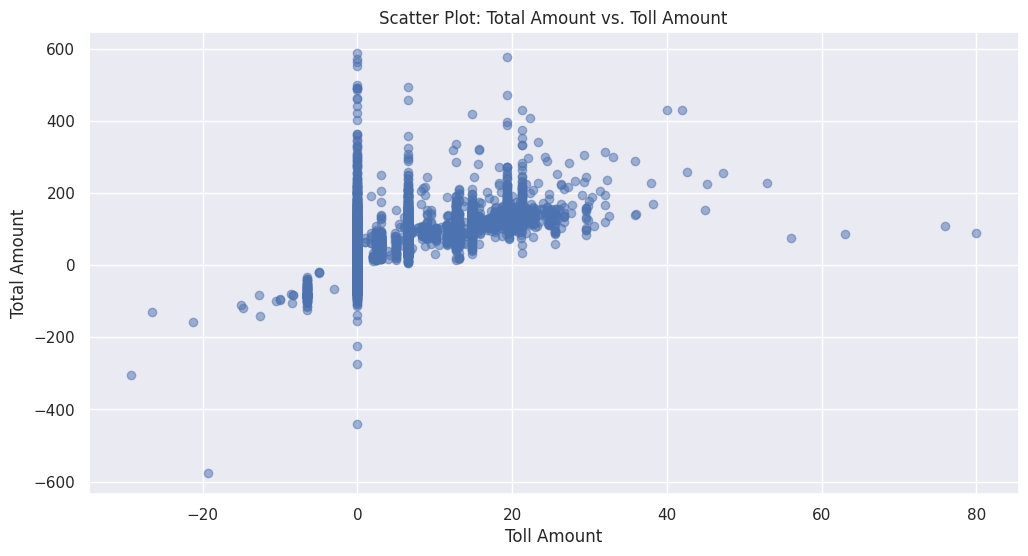

In [36]:
total_amount = data['total_amount']
tolls_amount = data['tolls_amount']

# Calculate the correlation coefficient
corr_coeff = np.corrcoef(tolls_amount, total_amount)[0, 1]
print("Correlation Coefficient",corr_coeff)

# Plot the scatter plot
plt.figure(figsize=(12, 6))
plt.scatter(tolls_amount, total_amount, alpha=0.5)

plt.title('Scatter Plot: Total Amount vs. Toll Amount')
plt.xlabel('Toll Amount')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()


From the above graph we can see the relationship between Total Amount and Toll Amount.We can see that total amount increases with toll amount.Which show correlation between both these features 

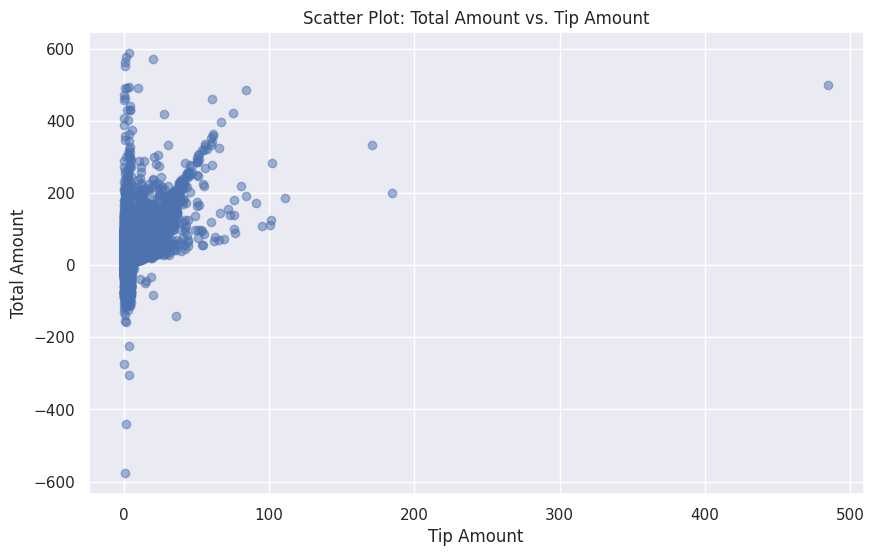

In [37]:
total_amount = data['total_amount']
tip_amount = data['tip_amount']

plt.figure(figsize=(10, 6))
plt.scatter(tip_amount, total_amount, alpha=0.5)
plt.title('Scatter Plot: Total Amount vs. Tip Amount')
plt.xlabel('Tip Amount')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

There is also come kind of relationship between Tip amount and Total Amount but relation is not as strong as between toll amount and total amount.But still it a good feature for prediction of total amount

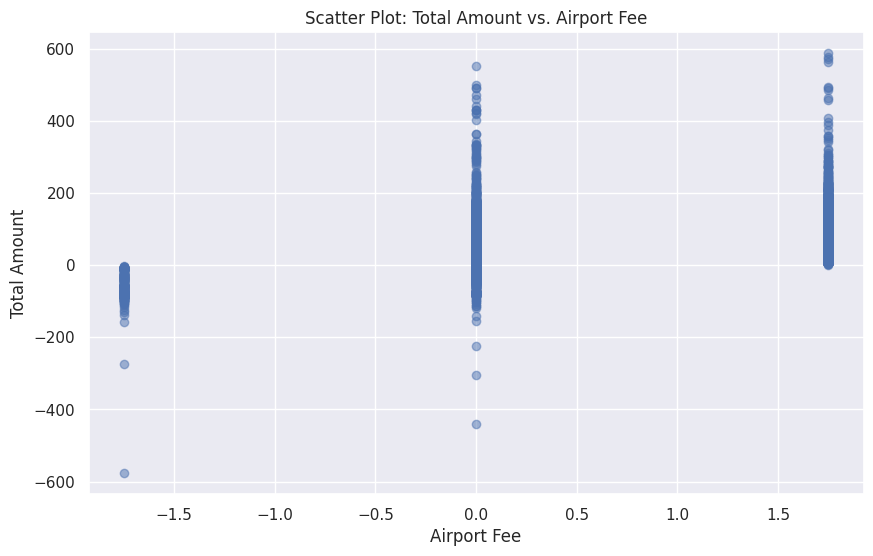

In [38]:
total_amount = data['total_amount']
Airport_fee = data['Airport_fee']

plt.figure(figsize=(10, 6))
plt.scatter(Airport_fee, total_amount, alpha=0.5)
plt.title('Scatter Plot: Total Amount vs. Airport Fee')
plt.xlabel('Airport Fee')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

There is also a good relationship between Airport fee and Total Amount.But relation is not as strong as between toll amount and total amount.But still it a good feature for prediction of total amount.We can aslo see that there is batch relationship exits between Airport Fee and Total Amount.Its kinda follow a y=mx curve too.

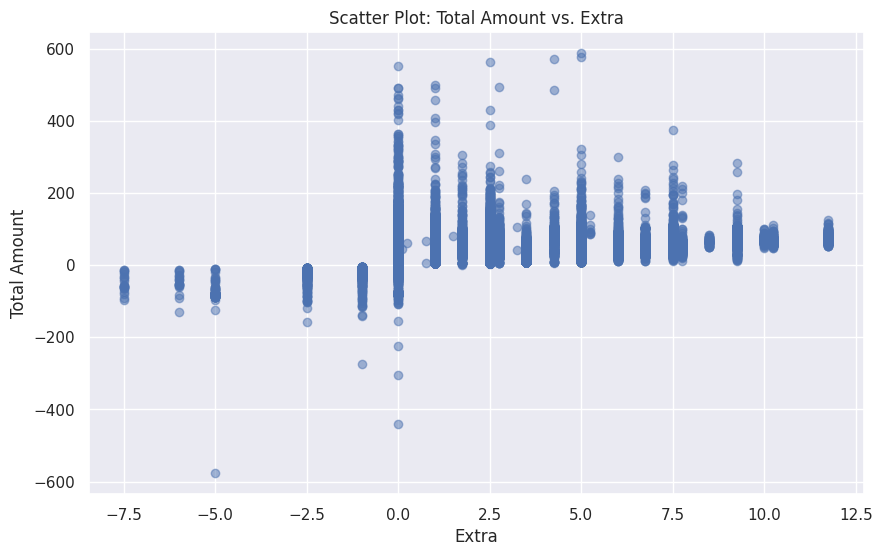

In [39]:
total_amount = data['total_amount']
extra = data['extra']

plt.figure(figsize=(10, 6))
plt.scatter(extra, total_amount, alpha=0.5)
plt.title('Scatter Plot: Total Amount vs. Extra')
plt.xlabel('Extra')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

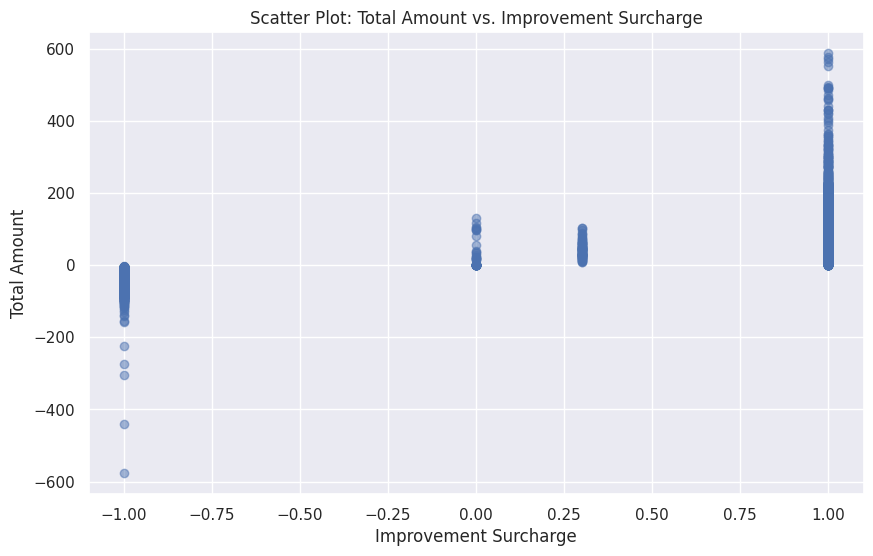

In [40]:
total_amount = data['total_amount']
impro = data['improvement_surcharge']

plt.figure(figsize=(10, 6))
plt.scatter(impro, total_amount, alpha=0.5)
plt.title('Scatter Plot: Total Amount vs. Improvement Surcharge')
plt.xlabel('Improvement Surcharge')
plt.ylabel('Total Amount')
plt.grid(True)
plt.show()

Not so much Linearity between the 2 columns but still usefull feature

# Ouliers Detection

We see many features which may have potenial outliers but most important of them is these trip distance because correlation between trip disance and total amount is not highest beacause of these outliers. If we able to remove these outliers than we can able to make good predictions as we already see from the graph

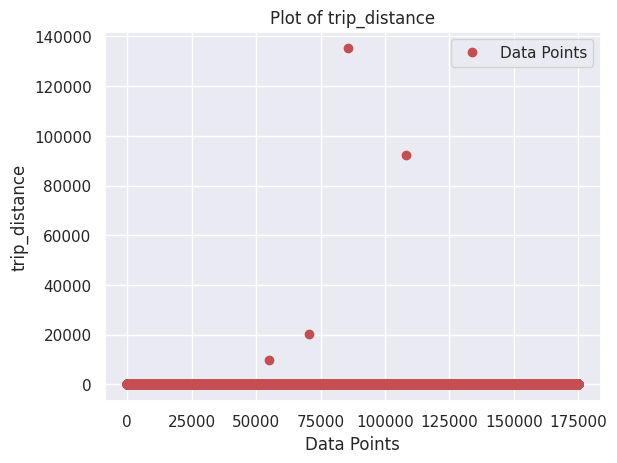

In [41]:
plt.plot(data['trip_distance'], 'ro', label='Data Points')
plt.xlabel('Data Points')
plt.ylabel('trip_distance')
plt.title('Plot of trip_distance')
plt.legend()
plt.show()

From The above graph we can see that only 4 points dont follow the usual trends. when we check total amount column value we came too know that these are outliers as other points with same total amount as these data points have less trip distance.

In [42]:
data["trip_distance"].where(data["trip_distance"]>200).value_counts()

trip_distance
9673.69      1
20314.00     1
135182.06    1
92292.43     1
Name: count, dtype: int64

In [43]:
data["total_amount"].where(data["trip_distance"]==135182.06).value_counts()

total_amount
27.92    1
Name: count, dtype: int64

In [44]:
data["total_amount"].where(data["trip_distance"]==92292.43).value_counts()

total_amount
18.0    1
Name: count, dtype: int64

In [45]:
data["total_amount"].where(data["trip_distance"]==20314).value_counts()

total_amount
42.56    1
Name: count, dtype: int64

In [46]:
data["total_amount"].where(data["trip_distance"]==9673.69).value_counts()

total_amount
9.6    1
Name: count, dtype: int64

In [47]:
data["trip_distance"].where((data["total_amount"]>=9)& (data["total_amount"]<=47) ).value_counts()

trip_distance
1.00     2415
0.90     2366
1.20     2353
1.10     2293
0.80     2273
         ... 
9.52        1
9.61        1
14.20       1
15.70       1
11.27       1
Name: count, Length: 1114, dtype: int64

In [48]:
ans=data["trip_distance"].mean()
# calculating mean of trip_distance column

Changing value 9673.69 with mean of trip distance

In [49]:
# data.loc[data["trip_distance"] == 9673.69, "trip_distance"] = ans

check if value is changed successfully or not

In [50]:
# data.iloc[55145:55150]

Replacing all the outliers with mean of trip distance

In [51]:
# data.loc[data["trip_distance"] == 135182.06, "trip_distance"] = ans
# data.loc[data["trip_distance"] == 20314.00, "trip_distance"] = ans
# data.loc[data["trip_distance"] == 92292.43, "trip_distance"] = ans

In [52]:
# data["trip_distance"].where(data["trip_distance"]>200).value_counts()

In [53]:
# total_amount = data['total_amount']
# trip_distance = data['trip_distance']

# plt.figure(figsize=(12, 6))
# plt.scatter(trip_distance, total_amount, alpha=0.5)
# plt.title('Scatter Plot: Total Amount vs. Trip Distance')
# plt.xlabel('Trip Distance')
# plt.ylabel('Total Amount')
# plt.grid(True)
# plt.show()

# Preprocessing

In [54]:
data.info()
# as ususal info as we know already

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175000 entries, 0 to 174999
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               175000 non-null  int64  
 1   tpep_pickup_datetime   175000 non-null  object 
 2   tpep_dropoff_datetime  175000 non-null  object 
 3   passenger_count        168923 non-null  float64
 4   trip_distance          175000 non-null  float64
 5   RatecodeID             168923 non-null  float64
 6   store_and_fwd_flag     168923 non-null  object 
 7   PULocationID           175000 non-null  int64  
 8   DOLocationID           175000 non-null  int64  
 9   payment_type           175000 non-null  object 
 10  extra                  175000 non-null  float64
 11  tip_amount             175000 non-null  float64
 12  tolls_amount           175000 non-null  float64
 13  improvement_surcharge  175000 non-null  float64
 14  total_amount           175000 non-nu

Categorical Columns in our Dataset

In [55]:
categorical_columns=list(data.select_dtypes(exclude = "number").columns)
categorical_columns

['tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'store_and_fwd_flag',
 'payment_type']

Numerical Columns in our Dataset

In [56]:
numerical_columns = list(data.select_dtypes("number").columns)
numerical_columns

['VendorID',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'extra',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'Airport_fee']

**Correlation Between Target Variable and Other features Before Preprocessing**

In [57]:
corr_matrix = data[numerical_columns].corr()
corr_wrt_total_amount = corr_matrix['total_amount']
print("Correlation with respect to 'total_amount':")
corr_wrt_total_amount.sort_values(ascending=False)

Correlation with respect to 'total_amount':


total_amount             1.000000
tolls_amount             0.684765
tip_amount               0.638658
Airport_fee              0.597829
extra                    0.234346
improvement_surcharge    0.224036
RatecodeID               0.055527
passenger_count          0.053224
VendorID                 0.039695
trip_distance            0.009911
PULocationID             0.000715
DOLocationID            -0.002954
congestion_surcharge    -0.147765
Name: total_amount, dtype: float64

we should have a close look on Trip distance and toll amount

In [58]:
def preprocess(data):
    
#Feature Engineering

    #   data['tpep_pickup_datetime'] = pd.to_datetime(data['tpep_pickup_datetime'])
    #   data['tpep_dropoff_datetime'] = pd.to_datetime(data['tpep_dropoff_datetime'])

    #   data['trip_duration'] = (data['tpep_dropoff_datetime'] - data['tpep_pickup_datetime']).dt.total_seconds()
    #   data['pickup_hour'] = data['tpep_pickup_datetime'].dt.hour
    #   data['pickup_day_of_week'] = data['tpep_pickup_datetime'].dt.dayofweek

# feature Engineering depends on model to model some model take use of it some dont
# dropping of "tpep_pickup_datetime" and "tpep_dropoff_datetime" columns after feature engineering

  data=data.drop(["tpep_pickup_datetime","tpep_dropoff_datetime"],axis=1)
  
 #dealing with outliers of trip distance
  
  mean_trip_distance = data["trip_distance"].mean()
  data.loc[data["trip_distance"] > 200, "trip_distance"] = mean_trip_distance

# using one hot encoder for payment type feature for encoding them into numerical types
  transformer_list = [
      ('ohe',OneHotEncoder(),['payment_type']),
  ]

# using columnTransformer so that ohe only applied on payment_type column,not on all columns
  ct0 = ColumnTransformer(transformers=transformer_list, remainder='passthrough', verbose_feature_names_out=False)

#fitting and transforming data using columnTransformer
  data = pd.DataFrame(ct0.fit_transform(data),columns = ct0.get_feature_names_out())

# replacing the values of store_and_fwd_flag with 0 and 1 so that they can also be numericals
  data['store_and_fwd_flag'] = data['store_and_fwd_flag'].replace({'Y': 1, 'N': 0})
# changing type of every column to numeric as models dont work on categoricals dataset
  data= data.apply(pd.to_numeric, errors='coerce').astype('float64')

    # using simpleImputer for imputing or we can say filling the missing values
    # for passenger_count we use median strategy for imputing
    # for RatecodeID,store_and_fwd_flag and Airport_fee we use most frequent strategy or simply as mode
  transformer_list = [
      ('median', SimpleImputer(missing_values=np.nan, strategy='median'), ['passenger_count']),
      ('most_freq', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), ['RatecodeID']),
      ('most_freq_1', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), ['store_and_fwd_flag']),
      ('most_freq_2', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), ['congestion_surcharge']),
      ('most_freq_3', SimpleImputer(missing_values=np.nan, strategy='most_frequent'), ['Airport_fee']),
  ]
  ct = ColumnTransformer(transformers=transformer_list, remainder='passthrough', verbose_feature_names_out=False)
  data = pd.DataFrame(ct.fit_transform(data),columns = ct.get_feature_names_out())

# using standardScaler for normailzing the values of trip_distance,extra,tip_amount,tolls_amount
  transformer_list = [
      ('scaling',StandardScaler(),['trip_distance', 'extra', 'tip_amount', 'tolls_amount']),
  ]

  ct2 = ColumnTransformer(transformers=transformer_list, remainder='passthrough', verbose_feature_names_out=False)
  data = pd.DataFrame(ct2.fit_transform(data),columns = ct2.get_feature_names_out())
  return data

In [59]:
data=preprocess(data)
#preprocessing the data means elimation of missing values,dealing with outliers, scaling of features,Encoding of categorical features
# data after preprocessing is pure numerical.so that we can now train or fit our models on these data

In [60]:
data.isnull().sum()
# checking again missing values 

trip_distance               0
extra                       0
tip_amount                  0
tolls_amount                0
passenger_count             0
RatecodeID                  0
store_and_fwd_flag          0
congestion_surcharge        0
Airport_fee                 0
payment_type_Cash           0
payment_type_Credit Card    0
payment_type_UPI            0
payment_type_Wallet         0
payment_type_unknown        0
VendorID                    0
PULocationID                0
DOLocationID                0
improvement_surcharge       0
total_amount                0
dtype: int64

Its gone there is no missing values

In [61]:
data.corr()
# now again find correltion for seeing any improvement in dataset or not

,trip_distance,extra,tip_amount,tolls_amount,passenger_count,RatecodeID,store_and_fwd_flag,congestion_surcharge,Airport_fee,payment_type_Cash,payment_type_Credit Card,payment_type_UPI,payment_type_Wallet,payment_type_unknown,VendorID,PULocationID,DOLocationID,improvement_surcharge,total_amount
trip_distance,1.000000,0.149303,0.505088,0.632378,0.049011,0.071312,-0.008982,-0.258896,0.609596,0.005683,-0.026702,-0.023256,0.061991,-0.003449,0.047508,-0.000344,-0.004018,0.006320,0.859141
extra,0.149303,1.000000,0.160331,0.201179,-0.026599,-0.067298,0.069783,0.057310,0.340768,-0.011930,0.109485,-0.005299,-0.165646,-0.092442,-0.530096,0.001495,0.002955,0.170831,0.234346
tip_amount,0.505088,0.160331,1.000000,0.411588,0.015791,-0.031870,-0.013224,-0.057489,0.328925,-0.357937,0.353540,-0.064283,0.014272,-0.089749,0.043941,0.000748,-0.000247,0.076436,0.638658
tolls_amount,0.632378,0.201179,0.411588,1.000000,0.037293,0.060594,-0.004572,-0.126197,0.417525,-0.009658,-0.002890,-0.013477,0.051520,-0.030225,0.023642,-0.000868,-0.002290,0.051190,0.684765
passenger_count,0.049011,-0.026599,0.015791,0.037293,1.000000,-0.022453,-0.015197,-0.006541,0.044908,0.047250,-0.008037,-0.007322,-0.074575,-0.001900,0.095558,-0.001008,-0.000739,-0.003627,0.048871
RatecodeID,0.071312,-0.067298,-0.031870,0.060594,-0.022453,1.000000,-0.004461,-0.198112,-0.003616,-0.029337,0.035150,-0.003488,-0.014824,-0.005653,-0.105150,-0.001111,-0.000638,0.002404,0.054034
store_and_fwd_flag,-0.008982,0.069783,-0.013224,-0.004572,-0.015197,-0.004461,1.000000,-0.000506,-0.003762,0.018817,-0.013560,0.020987,-0.015721,-0.002371,-0.126133,0.000316,0.001456,0.006723,-0.007610
congestion_surcharge,-0.258896,0.057310,-0.057489,-0.126197,-0.006541,-0.198112,-0.000506,1.000000,-0.338214,-0.088946,0.160646,-0.130889,0.057462,-0.291868,-0.021113,0.001327,0.000650,0.526918,-0.142738
Airport_fee,0.609596,0.340768,0.328925,0.417525,0.044908,-0.003616,-0.003762,-0.338214,1.000000,0.049015,-0.009394,-0.005894,-0.057714,-0.030697,0.033862,-0.000798,-0.004867,0.082715,0.585536
payment_type_Cash,0.005683,-0.011930,-0.357937,-0.009658,0.047250,-0.029337,0.018817,-0.088946,0.049015,1.000000,-0.841503,-0.037775,-0.086518,-0.053022,-0.008457,-0.001645,-0.000891,-0.017853,-0.067062


<Axes: >

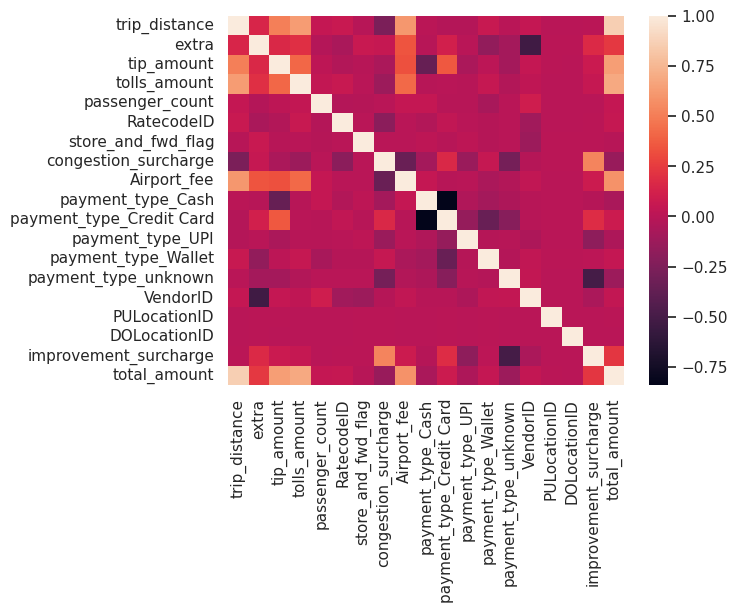

In [62]:
sns.heatmap(data.corr())
#using visualization to see correlation between different features and Target feature
# Lighter color indicates strong positive correlation
# Darker color indicates strong negative correlation

**Correlation Between Target Variable and Other Features after Preprocessing**

In [63]:
corr_matrix = data.corr()
corr_wrt_total_amount = corr_matrix['total_amount']
print("Correlation with respect to 'total_amount':")
corr_wrt_total_amount.sort_values(ascending=False)

Correlation with respect to 'total_amount':


total_amount                1.000000
trip_distance               0.859141
tolls_amount                0.684765
tip_amount                  0.638658
Airport_fee                 0.585536
extra                       0.234346
improvement_surcharge       0.224036
payment_type_Credit Card    0.085099
RatecodeID                  0.054034
passenger_count             0.048871
payment_type_Wallet         0.046087
VendorID                    0.039695
PULocationID                0.000715
DOLocationID               -0.002954
store_and_fwd_flag         -0.007610
payment_type_UPI           -0.055895
payment_type_Cash          -0.067062
payment_type_unknown       -0.123569
congestion_surcharge       -0.142738
Name: total_amount, dtype: float64

From these we can see that there is improvement in correlation between features as some of values goes up. 

In [64]:
corr_matrix = data.corr()
corr_wrt_trip_distance = corr_matrix['total_amount']['trip_distance']
print("Correlation between Total Amount and Trip distance:",corr_wrt_trip_distance)

Correlation between Total Amount and Trip distance: 0.8591410844477009


From among all the features trip distance feature correlation improves a lot 

# Splitting of Data

In [65]:
# splitting of data into features and target variable
X= data.drop('total_amount', axis=1)
y=data[['total_amount']]

# now again splitting of features into X_train and X_test and splitting of target variable into y_train and y_test 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
# find top 8 features which gives good F_regression score so that we can use these features in regression.
skb = SelectKBest(score_func=f_regression, k=8)
skb.fit_transform(X, y)
index= skb.get_support(indices=True)
print("Selected Features")
for i in index:
  print(data.columns[i])

Selected Features
trip_distance
extra
tip_amount
tolls_amount
congestion_surcharge
Airport_fee
payment_type_unknown
improvement_surcharge


/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We can see that Top features accoridng to f_regression score are:
* congestion_surcharge
* Airport_fee
* payment_type_unknown
* trip_distance
* extra
* tip_amount
* tolls_amount
* improvement_surcharge

# Models

**Linear Regression**

Hyper Parameter Tuning of Linear Regression model

In [67]:
# lr = LinearRegression()

# param_grid = {
#     'fit_intercept': [True, False],
# }

# grid_search = GridSearchCV(lr, param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

In [68]:
model_1 = LinearRegression(fit_intercept=True)
model_1.fit(X_train, y_train)
y_pred = model_1.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",mse)
r2_value=r2_score(y_test, y_pred)
print("R-squared (R2) Score: ",r2_value)
# Mean Squared Error:  80.62611476977152
# R-squared (R2) Score:  0.8761043336408306

Mean Squared Error:  80.62611476977152
R-squared (R2) Score:  0.8761043336408306


**Polynomial Regressor degree 2**

Hyper Parameter Tuning of Polynomial Regression

In [69]:
# lr=LinearRegression(fit_intercept=False)
# param_grid = {
#     'polynomialfeatures__degree': [2, 3],
# }

# model = make_pipeline(PolynomialFeatures(),lr)
# grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_
# model_2=grid_search.best_estimator_

Best parameters after HPT:{'polynomialfeatures__degree': 2}

In [70]:
# model_2.fit(X_train, y_train)
# y_pred = model_2.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ",mse)
# r2_value=r2_score(y_test, y_pred)
# print("R-squared (R2) Score: ",r2_value)
# # Mean Squared Error:  52.98048780615677
# # R-squared (R2) Score:  0.9185865167939526

**Polynomial Regressor degree 3**

In [71]:
# param_grid = {
#     'polynomialfeatures__degree': [2, 3],
#     'ridge__alpha': [0.01, 0.1, 1, 10]
# }

# model = make_pipeline(PolynomialFeatures(),Ridge())
# grid_search = GridSearchCV(model, param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_
# model_3=grid_search.best_estimator_
# #10 min

Best parameters after HPT: {'polynomialfeatures__degree': 2, 'ridge__alpha': 1}

In [72]:
# model_3.fit(X_train, y_train)
# y_pred = model_3.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ",mse)
# r2_value=r2_score(y_test, y_pred)
# print("R-squared (R2) Score: ",r2_value)
# # Mean Squared Error:  52.812408160698354
# # R-squared (R2) Score:  0.9188447996063509

**KNN Regressor**

In [73]:
# knn_regressor = KNeighborsRegressor()
# param_grid = {
#     'n_neighbors': [3, 5, 7],
#     'weights': ['uniform', 'distance'],
#     'p': [1, 2]  # 1 for Manhattan distance, 2 for Euclidean distance
# }

# grid_search = GridSearchCV(knn_regressor, param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_
# #55m

Best parameters after HPT: {n_neighbors=7,weights='distance',p=1}

In [74]:
# # {n_neighbors=7,weights='distance',p=1}
# model_4 = KNeighborsRegressor(n_neighbors=7,weights='distance',p=1)
# model_4.fit(X_train, y_train)
# y_pred = model_4.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ",mse)
# r2_value=r2_score(y_test, y_pred)
# print("R-squared (R2) Score: ",r2_value)
# # Mean Squared Error:  245.79222180941616
# # R-squared (R2) Score:  0.8075680349660708

**SVR or SVM regressor**

In [75]:
# svm_reg = SVR()

# svm_reg.fit(X_train, y_train)
# y_pred = svm_reg.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ",mse)
# r2_value=r2_score(y_test, y_pred)
# print("R-squared (R2) Score: ",r2_value)

SVR or SVM is too much expensive 

# MLPRegressor

In [76]:
# model = Pipeline(steps=[
#     ('mlpr', MLPRegressor())
# ])
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ",mse)
# r2_value=r2_score(y_test, y_pred)
# print("R-squared (R2) Score: ",r2_value)
# # Mean Squared Error:  39.1375319924138
# # R-squared (R2) Score:  0.9398585604713846

In [77]:
# model = Pipeline(steps=[
#     ('mlpr', MLPRegressor())
# ])

# param_grid = {
#     'mlpr__activation': ['relu', 'tanh'],
#     'mlpr__alpha':[0.0001,0.001,0.01]
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

Best parameters: activation='relu',alpha=0.01

In [78]:
# model_5 = Pipeline(steps=[
#     ('mlpr', MLPRegressor(activation='relu',alpha=0.01))
# ])
# model_5.fit(X_train, y_train)
# y_pred = model_5.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ",mse)
# r2_value=r2_score(y_test, y_pred)
# print("R-squared (R2) Score: ",r2_value)
# # Mean Squared Error:  37.569524989246155
# # R-squared (R2) Score:  0.9422680685205823

# Bagging

In [79]:
# model = Pipeline(steps=[
#     ('bagreg', BaggingRegressor(base_estimator=DecisionTreeRegressor()))
# ])
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ",mse)
# r2_value=r2_score(y_test, y_pred)
# print("R-squared (R2) Score: ",r2_value)
# # Mean Squared Error:  32.20608704457143
# # R-squared (R2) Score:  0.9505098983548615

In [80]:
# model = Pipeline(steps=[
#     ('bagreg', BaggingRegressor(base_estimator=DecisionTreeRegressor()))
# ])

# param_grid = {
#     'bagreg__n_estimators': [10,30,50],
#     'bagreg__max_samples': [0.5,0.7,1],
#     'bagreg__max_features': [0.5,0.7,1]
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# grid_search.best_params_
# #42m 53s

Best Parameters: max_features=1,max_samples=1,n_estimators=50

In [81]:
# # { max_features=1,max_samples=1,n_estimators=50 }
# model_6= Pipeline(steps=[
#     ('bagreg', BaggingRegressor(DecisionTreeRegressor(),max_features=1,max_samples=1,n_estimators=50))
# ])
# model_6.fit(X_train, y_train)
# y_pred = model_6.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ",mse)
# r2_value=r2_score(y_test, y_pred)
# print("R-squared (R2) Score: ",r2_value)
# #Mean Squared Error:  651.5898726956572
# #R-squared (R2) Score:  -0.0012780809423535988

# Boosting

In [82]:
# model = Pipeline(steps=[
#     ('gbr', GradientBoostingRegressor())
# ])
# model.fit(X_train, y_train)
# y_pred = model.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ",mse)
# r2_value=r2_score(y_test, y_pred)
# print("R-squared (R2) Score: ",r2_value)
# # Mean Squared Error:  34.18550497467238
# # R-squared (R2) Score:  0.9474681878104129

In [83]:
# model = Pipeline(steps=[
#     ('gbr', GradientBoostingRegressor())
# ])

# param_grid = {
#     'gbr__n_estimators': [50,100],
#     'gbr__learning_rate': [0.01,0.1],
#     'gbr__max_depth': [3,4]
# }

# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# print(grid_search.best_params_)

Best Parameters: {'gbr__learning_rate': 0.1, 'gbr__max_depth': 4, 'gbr__n_estimators': 100}

In [84]:
## {'gbr__learning_rate': 0.1, 'gbr__max_depth': 4, 'gbr__n_estimators': 100}
model_7 = Pipeline(steps=[
    ('gbr', GradientBoostingRegressor(learning_rate=0.1,max_depth=4,n_estimators=100))
])
model_7.fit(X_train, y_train)
y_pred = model_7.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",mse)
r2_value=r2_score(y_test, y_pred)
print("R-squared (R2) Score: ",r2_value)
## Mean Squared Error:  30.223970997527985
## R-squared (R2) Score:  0.9535557550124829

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Mean Squared Error:  30.414375289280766
R-squared (R2) Score:  0.9532631666039788


**Extreme Gradient Boosting(XGBoost) Regression**

In [85]:
# xgbr = XGBRegressor()
# xgbr.fit(X_train, y_train)
# y_pred = xgbr.predict(X_test)
# mse = mean_squared_error(y_test, y_pred)
# print("Mean Squared Error: ",mse)
# r2_value=r2_score(y_test, y_pred)
# print("R-squared (R2) Score: ",r2_value)
# # Mean Squared Error:  27.969441036940218
# # R-squared (R2) Score:  0.9570202217375801

# Decision Tree and Random Forest Regressor

**Random Forest Regressor**

In [86]:
# rfreg = RandomForestRegressor()

# param_grid = {
#     'n_estimators': [50,100],
#     'max_depth': [7,10],
#     'min_samples_split': [2,5],
#     'min_samples_leaf': [1,2],
# }

# grid_search = GridSearchCV(rfreg, param_grid, scoring='neg_mean_squared_error', cv=5)
# grid_search.fit(X_train, y_train)
# grid_search.best_params_
# 40min

Best parameters:{max_depth=10, min_samples_leaf=2, min_samples_split=5,n_estimators=50}

In [87]:
# best etsimator previously RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,n_estimators=50)
model_8 = RandomForestRegressor(max_depth=10, min_samples_leaf=2, min_samples_split=5,n_estimators=50)
model_8.fit(X_train, y_train)
y_pred = model_8.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",mse)
r2_value=r2_score(y_test, y_pred)
print("R-squared (R2) Score: ",r2_value)
# Mean Squared Error:  30.31904468101867
# R-squared (R2) Score:  0.9534096582124209

/tmp/ipykernel_20/509990517.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_8.fit(X_train, y_train)


Mean Squared Error:  30.56427037138365
R-squared (R2) Score:  0.9530328274497962


**Decision Tree Regressor**

In [88]:
# model = Pipeline(steps=[
#     ('dtr', DecisionTreeRegressor())
# ])

# param_grid = {
#     'dtr__max_depth': [5,10,15,20],
#     'dtr__min_samples_split': [2,5,10,20],
#     'dtr__min_samples_leaf': [1,2,5,10]
# }
# grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')
# grid_search.fit(X_train, y_train)
# grid_search.best_params_

Best Parameters: max_depth=10,min_samples_leaf=1,min_samples_split=10

In [89]:
# best etsimator previously DecisionTreeRegressor(max_depth=10,min_samples_leaf=1,min_samples_split=10)
tree_reg = DecisionTreeRegressor(max_depth=10,min_samples_leaf=1,min_samples_split=10)
tree_reg.fit(X_train, y_train)
y_pred = tree_reg.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error: ",mse)
r2_value=r2_score(y_test, y_pred)
print("R-squared (R2) Score: ",r2_value)
# Mean Squared Error:  36.607732379198794
# R-squared (R2) Score:  0.9437460255902167

Mean Squared Error:  36.65332547096998
R-squared (R2) Score:  0.9436759640908813


# TESTing MOdels

Reading test.csv  

In [90]:
data_test = pd.read_csv("/kaggle/input/taxi-fare-guru-total-amount-prediction-challenge/test.csv")

Preprocessing the test dataset means elimination of missing values, handling with outliers and encoding of categorical Columns and scaling of numerical columns

In [91]:
data_test=preprocess(data_test)

Making predications using different models

In [92]:
y_pred_t = model_8.predict(data_test)

Creation and Submission of submission.csv 

In [93]:
submission = pd.DataFrame(columns = ["ID","total_amount"])
submission["ID"] = [i for i in range(1,len(y_pred_t)+1)]
submission["total_amount"] = y_pred_t
submission.to_csv('submission.csv',index=False)